<a href="https://colab.research.google.com/github/idenw/statistics-with-python/blob/main/zscore%20and%20how%20it's%20used%20to%20determine%20an%20outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats 

https://statistics.laerd.com/statistical-guides/standard-score-4.php

https://medium.com/@gulcanogundur/normal-da%C4%9F%C4%B1l%C4%B1m-z-score-ve-standardizasyon-782963bc123e

In [2]:
mu, sigma = 100, 5
s= np.random.normal(mu, sigma, 200) # generate 200 samples, from a normal distubition,centered around the value 100, with a standart deviation of 10

In [3]:
s

array([101.55831919, 106.49640261, 100.80613493, 109.94559834,
        99.19851208, 100.92049757, 101.42317442, 102.96047628,
        95.11808642,  99.96474581,  98.139914  ,  98.87605547,
       100.96500138, 103.23410326,  97.07276271, 100.8160583 ,
       110.3828393 ,  90.01620107,  94.26746974, 110.85167632,
       101.2208268 ,  92.39935449,  95.3718328 ,  97.50431934,
       101.98108343, 103.98123431,  96.07440322,  93.14794107,
        94.91559294, 100.29475002,  92.56984336, 105.0502643 ,
       101.74601383,  98.46045108, 101.46386095,  98.55763672,
       101.09532432,  97.6441627 ,  99.60654647,  99.44154352,
       102.62679958, 102.59533974, 101.67392156,  89.8877754 ,
        99.23115649, 101.84196176,  97.28857166, 102.5208043 ,
        98.79287392, 102.99740149, 107.34527262,  96.37634194,
        96.79398681, 100.79656923,  91.09738699,  96.64506888,
        99.62628784,  98.59021339, 107.0003214 , 100.06085008,
       104.47891468, 102.50123569,  90.15132125,  99.10

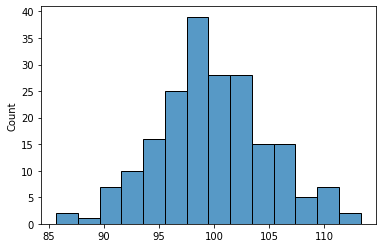

In [4]:
sns.histplot(s) # as you see most of values are scattered between the values 40 and 60 as it is obvious that we have chosen a normal distrubition hving an average value of 50 and standart deviaton of 10
plt.show()

In [5]:
s[90] = 180
s[50] = -40

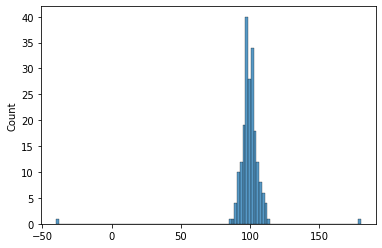

In [6]:
sns.histplot(s)
plt.show()

In [7]:
df = pd.DataFrame(s, columns=["Data"]) #create a dataframe from distrubution we have
df.head()

,Data
0,101.558319
1,106.496403
2,100.806135
3,109.945598
4,99.198512


# Calculating the z_score

In [8]:
for col in df.columns:
    col_zscore = col + "_zscore"
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)
# creating a new column in my dataframe, which would be called "data_zscore" where I take the row value and I subtract that columns mean from that row value and divide by the standard deviation of that column 

In [9]:
df.head()

,Data,Data_zscore
0,101.558319,0.161294
1,106.496403,0.558395
2,100.806135,0.100807
3,109.945598,0.835765
4,99.198512,-0.028472


pandas.DataFrame.std
DataFrame.std(axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)[source]¶
Return sample standard deviation over requested axis.

Normalized by N-1 by default. This can be changed using the ddof argument

Parameters
axis{index (0), columns (1)}
skipnabool, default True
Exclude NA/null values. If an entire row/column is NA, the result will be NA.

levelint or level name, default None
If the axis is a MultiIndex (hierarchical), count along a particular level, collapsing into a Series.

ddofint, default 1
Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.

numeric_onlybool, default None
Include only float, int, boolean columns. If None, will attempt to use everything, then use only numeric data. Not implemented for Series.

Returns
Series or DataFrame (if level specified)

* Z-Score is essentially how many standart deviations away is my actual value from the mean value based on the business context, you can define the threshold value for the z score to classify a point as an outlier or not in the current scheme of things.

In [10]:
df["outlier"] = (abs(df["Data_zscore"])>3).astype(int)

dataframe.abs() is one of the simplest pandas dataframe function. It returns an object with absolute value taken and it is only applicable to objects that are all numeric. It does not work with any Nan value either. abs() function can also be used with complex numbers to find their absolute value.

In [11]:
df.tail() # actual data column,	Data_zscore,outlier

,Data,Data_zscore,outlier
195,107.144837,0.610539,0
196,104.463808,0.394942,0
197,96.174486,-0.271651,0
198,102.891883,0.268534,0
199,99.502089,-0.004059,0


* let's find out the rows at my z_score has classified as outliers

In [12]:
df.loc[df.outlier == 1]

,Data,Data_zscore,outlier
50,-40.0,-11.222249,1
90,180.0,6.469255,1


In [13]:
(df.outlier.value_counts())

0    198
1      2
Name: outlier, dtype: int64

In [14]:
print("number of outliers = " + str(df.outlier.value_counts()[1]))

number of outliers = 2


In [15]:
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.2, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.histplot(df[col], kde=False, bins = 50,color="r")
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

In [16]:
def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.1, print_list = False):
    z_scores = df["Data_zscore"]
    threshold_list = []
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
        df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
        df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), 
               colors="r", ls = ":"
              )
    plt.annotate("Zscore : {}\nValue : {}\nPercentile : {}".format(best_treshold, outlier_limit, 
                                                                   (np.round(percentile_threshold, 3), 
                                                                    np.round(100-percentile_threshold, 3))), 
                 (best_treshold, df_outlier.outlier_count.max()/2))
    #plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, outlier_limit, percentile_threshold)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


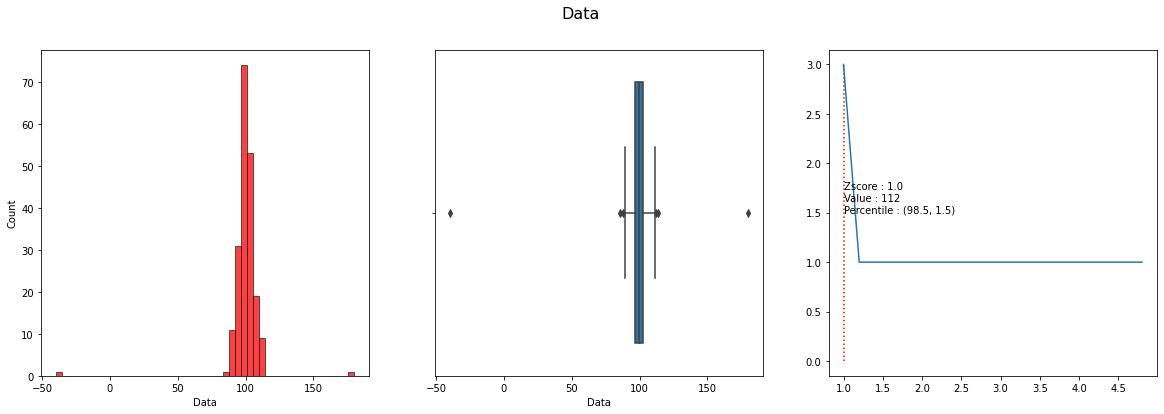

In [19]:
outlier_inspect(df,"Data")

In [20]:
df["outlier"] = (abs(df["Data_zscore"])>1).astype(int)
df.head()

,Data,Data_zscore,outlier
0,101.558319,0.161294,0
1,106.496403,0.558395,0
2,100.806135,0.100807,0
3,109.945598,0.835765,0
4,99.198512,-0.028472,0


In [21]:
df.loc[df.outlier == 1]

,Data,Data_zscore,outlier
50,-40.000000,-11.222249,1
69,85.692080,-1.114604,1
86,112.129922,1.011420,1
90,180.000000,6.469255,1
182,113.281411,1.104018,1


In [22]:
print("number of outliers = " + str(df.outlier.value_counts()[1]))

number of outliers = 5


In [23]:
df=df.loc[df.outlier == 0]

In [24]:
df.head()

,Data,Data_zscore,outlier
0,101.558319,0.161294,0
1,106.496403,0.558395,0
2,100.806135,0.100807,0
3,109.945598,0.835765,0
4,99.198512,-0.028472,0


In [25]:
df.loc[df.outlier == 1]

,Data,Data_zscore,outlier


In [26]:
(df.outlier.value_counts())

0    195
Name: outlier, dtype: int64

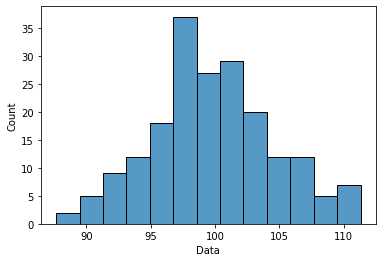

In [27]:
sns.histplot(df["Data"])
plt.show()